In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2.1.3 Modeling Equity via a Discounted Dividend Growth Model

On May 31, 2024, Nvidia trades at $\$$1,096.33, and pays annual dividends at $\$$0.16. (Data Source: [Nasdaq](https://www.nasdaq.com/market-activity/stocks/nvda))

In [ ]:
P0 = 1096.33  # current price
D0 = 0.16     # current dividend
growth_rate = np.arange(0.0001, 1.0, 0.0001)  # 1bps to 100%
return_rate = np.arange(0.0001, 1.0, 0.0001)  # 1bps to 100%

p = pd.DataFrame(index=return_rate, columns=growth_rate, dtype=np.float64)
p.index.name = 'r'
p.columns.name = 'g'
for g in growth_rate:
    r = np.where(return_rate > g, return_rate, np.nan)
    p.loc[:, g] = np.where(r > g, D0 * (1 + g) / (r - g), np.nan)

In [ ]:
match_matrix = p[(p > 1096) & (p < 1097)].dropna(how='all').dropna(axis=1, how='all')  # filter for price close to P0
match_matrix

g,0.3701,0.3702,0.3703,0.3704,0.3705,0.3706,0.3707,0.3708,0.3709,0.3710,0.3711,0.3712
r,,,,,,,,,,,,
0.3703,1096.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3704,NaN,1096.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3705,NaN,NaN,1096.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3706,NaN,NaN,NaN,1096.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3707,NaN,NaN,NaN,NaN,1096.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3708,NaN,NaN,NaN,NaN,NaN,1096.48,NaN,NaN,NaN,NaN,NaN,NaN
0.3709,NaN,NaN,NaN,NaN,NaN,NaN,1096.56,NaN,NaN,NaN,NaN,NaN
0.3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.64,NaN,NaN,NaN,NaN
0.3711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.72,NaN,NaN,NaN


In [ ]:
match_result = match_matrix.stack().dropna().to_frame("ImpliedPrice")
match_result

,,ImpliedPrice
r,g,
0.3703,0.3701,1096.08
0.3704,0.3702,1096.16
0.3705,0.3703,1096.24
0.3706,0.3704,1096.32
0.3707,0.3705,1096.40
0.3708,0.3706,1096.48
0.3709,0.3707,1096.56
0.3710,0.3708,1096.64
0.3711,0.3709,1096.72


Since Nvidia is a growthy stock which pays little dividend, the market requiring rate of return close to its growth rate makes sense.

### 2.1.5 Private Equity vs. Public Equity Returns in Practice

The following example gets 1Y daily returns data from yahoo finance, and compare returns of SPY and hypothetical private equity index (i.e. HFRI) data for demonstration purposes. In practice, you can replace it with actual HFRI data.

*Note: If you are not running this notebook from the default GitHub directory, please download `SPLPEQTR_Returns.xls` from the `data/` folder, upload it to your current working directory, and remove `data/` from the file path.*

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Cumulative Returns SPY vs SPLPEQTR'}, xlabel='Date', ylabel='Cumulative Return'>

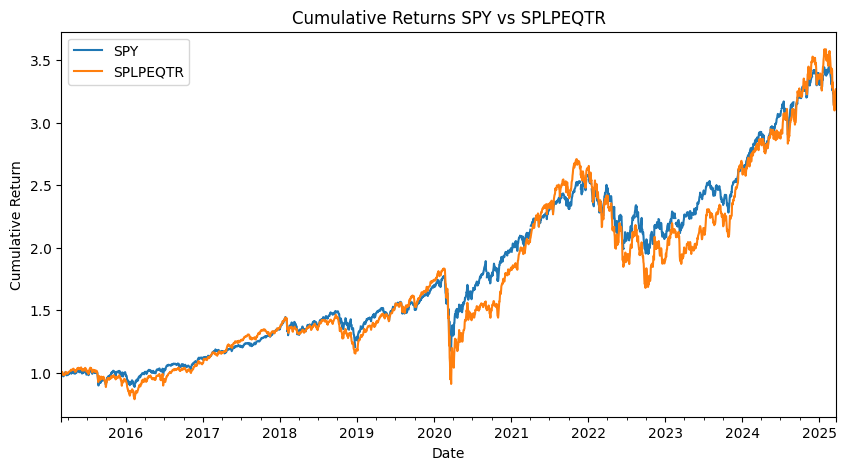

In [ ]:
# get daily returns data
SPY = yf.download('SPY', start='2015-02-27', end='2025-03-21', auto_adjust=False)[['Adj Close']]
SPLPEQTR = pd.read_excel('data/SPLPEQTR_Returns.xls', skiprows=6, nrows=2626, index_col=0)
SPY_ret = SPY.pct_change().dropna()
SPLPEQTR_ret = SPLPEQTR.pct_change().dropna()
SPY_cumret = (1 + SPY_ret).cumprod()
SPLPEQTR_cumret = (1 + SPLPEQTR_ret).cumprod()

cumret = pd.concat([SPY_cumret, SPLPEQTR_cumret], axis=1)
cumret.columns = ['SPY', 'SPLPEQTR']
cumret.plot(title="Cumulative Returns SPY vs SPLPEQTR", xlabel="Date", ylabel="Cumulative Return", figsize=(10,5))

### 2.2.5 Municipal Bond Valuation in Practice

The following example gets yield data from yahoo finance, and compare MUB and GOVT's before-tax and after-tax yield.

In [ ]:
mub = yf.Ticker("MUB")
govt = yf.Ticker("GOVT")

# get annual yield - this is trailing dividend yield (TTM); value depends on fetch time
mub_yield = mub.info["yield"]
govt_yield = govt.info["yield"]

# assume tax bracket for the investor is 24%
tax_rate = 0.24

# compute after tax yield
mub_yield_after_tax = mub_yield  # since MUB is tax-exempt at federal level
govt_yield_after_tax = govt_yield * (1 - tax_rate)

print(f"MUB Before Tax & After Tax Yield: {mub_yield:.2%}")
print(f"GOVT Before Tax Yield: {govt_yield:.2%}; GOVT After Tax Yield: {govt_yield_after_tax:.2%}")

MUB Before Tax & After Tax Yield: 3.11%
GOVT Before Tax Yield: 3.41%; GOVT After Tax Yield: 2.59%


### 2.4.2 Option Straddles in Practice

The following python code can be used to generate a payoff function for a vanilla call
and put options:

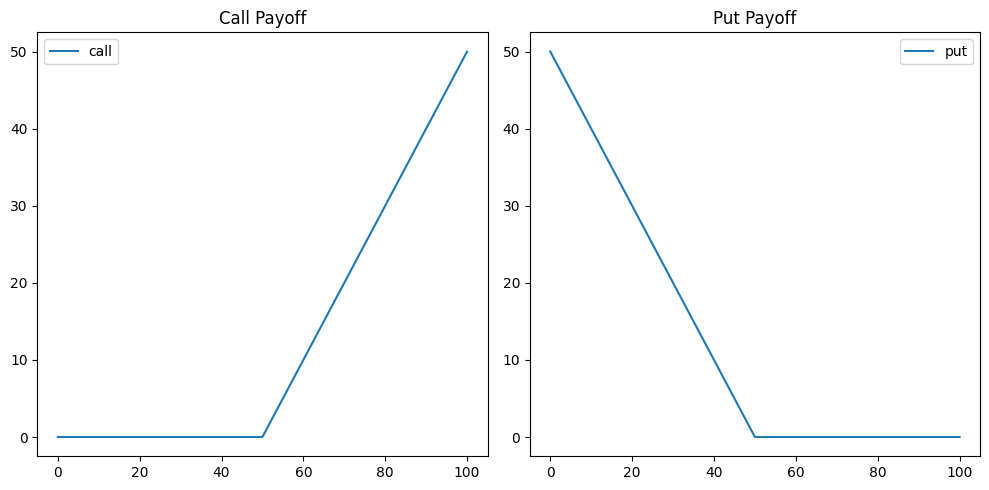

In [ ]:
def call_payoff(S, K):
    return np.maximum(S - K, 0)

def put_payoff(S, K):
    return np.maximum(K - S, 0)


K = 50  # strike price
S = np.linspace(0, 100, 1000)  # asset price

call = call_payoff(S, K)
put = put_payoff(S, K)

# Plot the payoffs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(S, call, label='call')
ax1.set_title('Call Payoff')
ax1.legend()
ax2.plot(S, put, label='put')
ax2.set_title('Put Payoff')
ax2.legend()
plt.tight_layout()
plt.show()

## 2.5.2 Equity Index Total Return Swaps in Practice

In the following coding example we show how to compute the present value of a swap assuming that the values of the reference variables are known:


In [ ]:
def price_swap(coupon, reference_rates, rf_rate, delta):
    n_periods = len(reference_rates)

    fixed_leg = 0
    for period in range(1, n_periods + 1):
        disc_factor = np.exp(-rf_rate * delta * period)
        fixed_leg += delta * coupon * disc_factor

    floating_leg = 0
    for period, ref_rate in enumerate(reference_rates, 1):
        disc_factor = np.exp(-rf_rate * delta * period)
        floating_leg += delta * reference_rates[period - 1] * disc_factor

    return floating_leg - fixed_leg

coupon = 0.04  # coupon rate
reference_rates = [0.01, 0.02, 0.03]
rf_rate = 0.02  # risk-free rate
delta = 1 / 12  # monthly payments
payer_swap = price_swap(coupon, reference_rates, rf_rate, delta)  # pay fixed, receive floating
print(f"price of {payer_swap=:.4f} per numeraire")

price of payer_swap=-0.0050 per numeraire


This approach can be used either after the fact, when all fixings for the reference variable have been posted, or when the values for the floating leg can be inferred from a forward or futures curve for the asset.